In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from keras.applications import VGG16
import os
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, LSTM, Input, Embedding, Reshape, Concatenate
from keras_preprocessing import image
from collections import defaultdict
import pickle
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.models import Model
from keras.layers.merge import add
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [2]:
captions_enc_df = pd.read_csv('/content/drive/My Drive/Image Caption Generator/caption_enc.csv')
images_dir = '/content/drive/My Drive/Images'

In [3]:
captions_path = '/content/drive/My Drive/Image Caption Generator/captions (1).txt'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
captions_df = pd.read_csv(captions_path)
images_list = captions_df['image']
captions_list = captions_df['caption']

In [ ]:
vgg16 = VGG16(include_top = True, weights='imagenet', input_shape=(224,224,3))
vgg16 = Model(inputs=vgg16.inputs, outputs=vgg16.layers[-2].output)

553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
encoding_dict = {}

In [ ]:
images = os.listdir(images_dir)

for i in range(len(images)):
  img_path = images_dir + '/' + images[i]
  img = image.load_img(img_path, target_size=(224,224))
  img = image.img_to_array(img)

  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

  img_arr = preprocess_input(img_arr)

  encoding = vgg16.predict(img_arr)
  encoding_dict[images[i]] = encoding
  
  if(i%200 == 0):
    print(str(i) + ' Images encoded')


0 Images encoded
200 Images encoded
400 Images encoded
600 Images encoded
800 Images encoded
1000 Images encoded
1200 Images encoded
1400 Images encoded
1600 Images encoded
1800 Images encoded
2000 Images encoded
2200 Images encoded
2400 Images encoded
2600 Images encoded
2800 Images encoded
3000 Images encoded
3200 Images encoded
3400 Images encoded
3600 Images encoded
3800 Images encoded
4000 Images encoded
4200 Images encoded
4400 Images encoded
4600 Images encoded
4800 Images encoded
5000 Images encoded
5200 Images encoded
5400 Images encoded
5600 Images encoded
5800 Images encoded
6000 Images encoded
6200 Images encoded
6400 Images encoded
6600 Images encoded
6800 Images encoded
7000 Images encoded
7200 Images encoded
7400 Images encoded
7600 Images encoded
7800 Images encoded
8000 Images encoded


In [ ]:
try:
  encoding_file = open('/content/drive/My Drive/encoding_dict.pkl','wb')
  pickle.dump(encoding_dict, encoding_file)
  encoding_file.close()
except:
  print("Something went wrong")


In [37]:
with open('/content/drive/My Drive/Image Caption Generator/encoding_dict.pkl', 'rb') as f:
    encoding_dict = pickle.load(f)

In [10]:
encoding_dict['997722733_0cb5439472.jpg']

array([[0.       , 0.       , 0.9586386, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [ ]:
all_encodings = []
for j in range(len(images_list)):
  for i in range(len(images)):
    if (images_list[j] == images[i]):
     all_encodings.append(encoding_dict[images[i]])

captions_df['encodings'] = all_encodings

In [11]:
captions_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [12]:
def clean_captions(captions_list):
  clean_captions = []
  
  for i in range(len(captions_list)):
    captions_list[i] = captions_list[i].lower()
    captions_list[i] = captions_list[i].replace('.','')
    words = captions_list[i].split()

    words = [word for word in words if len(word)>1]
    words = [word for word in words if word.isalpha()]

    captions_list[i] = ' '.join(words)

    captions_list[i] = captions_list[i].replace('[{}]'.format(string.punctuation), ' ')

    clean_captions.append(captions_list[i])

    

  return clean_captions



In [6]:
captions_enc_df.drop('encodings', axis=1)


,Unnamed: 0,image,caption,clean_captions
0,0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...,startseq child in pink dress is climbing up se...
1,1,1000268201_693b08cb0e.jpg,girl going into wooden building,startseq girl going into wooden building endseq
2,2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse,startseq little girl climbing into wooden play...
3,3,1000268201_693b08cb0e.jpg,little girl climbing the stairs to her playhouse,startseq little girl climbing the stairs to he...
4,4,1000268201_693b08cb0e.jpg,little girl in pink dress going into wooden cabin,startseq little girl in pink dress going into ...
...,...,...,...,...
40450,40450,997722733_0cb5439472.jpg,man in pink shirt climbs rock face,startseq man in pink shirt climbs rock face en...
40451,40451,997722733_0cb5439472.jpg,man is rock climbing high in the air,startseq man is rock climbing high in the air ...
40452,40452,997722733_0cb5439472.jpg,person in red shirt climbing up rock face cove...,startseq person in red shirt climbing up rock ...
40453,40453,997722733_0cb5439472.jpg,rock climber in red shirt,startseq rock climber in red shirt endseq


In [7]:
all_encodings = np.load('/content/drive/My Drive/Image Caption Generator/encodings_2.npy')

In [8]:
captions_enc_df['encodings'] = list(all_encodings)

In [9]:
captions_enc_df

,Unnamed: 0,image,caption,encodings,clean_captions
0,0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15...",startseq child in pink dress is climbing up se...
1,1,1000268201_693b08cb0e.jpg,girl going into wooden building,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15...",startseq girl going into wooden building endseq
2,2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15...",startseq little girl climbing into wooden play...
3,3,1000268201_693b08cb0e.jpg,little girl climbing the stairs to her playhouse,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15...",startseq little girl climbing the stairs to he...
4,4,1000268201_693b08cb0e.jpg,little girl in pink dress going into wooden cabin,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15...",startseq little girl in pink dress going into ...
...,...,...,...,...,...
40450,40450,997722733_0cb5439472.jpg,man in pink shirt climbs rock face,"[[0.0, 0.0, 0.9586386, 0.0, 0.87273586, 1.9431...",startseq man in pink shirt climbs rock face en...
40451,40451,997722733_0cb5439472.jpg,man is rock climbing high in the air,"[[0.0, 0.0, 0.9586386, 0.0, 0.87273586, 1.9431...",startseq man is rock climbing high in the air ...
40452,40452,997722733_0cb5439472.jpg,person in red shirt climbing up rock face cove...,"[[0.0, 0.0, 0.9586386, 0.0, 0.87273586, 1.9431...",startseq person in red shirt climbing up rock ...
40453,40453,997722733_0cb5439472.jpg,rock climber in red shirt,"[[0.0, 0.0, 0.9586386, 0.0, 0.87273586, 1.9431...",startseq rock climber in red shirt endseq


In [10]:
captions_list = captions_enc_df['clean_captions']
encodings_list = captions_enc_df['encodings']
img_list = captions_enc_df['image']
captions =[]
encodings = []
imgs = []
for i in range(len(all_encodings)):
  if(i%5 == 0):
    captions.append(captions_list[i])
    captions.append(captions_list[i+1])
    encodings.append(encodings_list[i])
    encodings.append(encodings_list[i+1])
    imgs.append(img_list[i])
    imgs.append(img_list[i+1])


In [11]:
captions_enc_mod = pd.DataFrame()

In [12]:
captions_enc_mod['images'] = imgs
captions_enc_mod['captions'] = captions
captions_enc_mod['encodings'] = encodings

In [13]:
captions_enc_mod

,images,captions,encodings
0,1000268201_693b08cb0e.jpg,startseq child in pink dress is climbing up se...,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
1,1000268201_693b08cb0e.jpg,startseq girl going into wooden building endseq,"[[2.507647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
2,1001773457_577c3a7d70.jpg,startseq black dog and spotted dog are fightin...,"[[0.0, 0.0, 0.49410847, 0.0, 0.0, 0.0, 0.0, 1...."
3,1001773457_577c3a7d70.jpg,startseq black dog and dog playing with each o...,"[[0.0, 0.0, 0.49410847, 0.0, 0.0, 0.0, 0.0, 1...."
4,1002674143_1b742ab4b8.jpg,startseq little girl covered in paint sits in ...,"[[1.4937079, 0.0, 0.53568363, 0.0, 6.0624743, ..."
...,...,...,...
16177,99679241_adc853a5c0.jpg,startseq large bird stands in the water on the...,"[[0.0, 3.1392221, 0.0, 0.8304528, 0.11121237, ..."
16178,997338199_7343367d7f.jpg,startseq person stands near golden walls endseq,"[[2.3300762, 0.0, 0.0, 0.0, 5.3226986, 1.72874..."
16179,997338199_7343367d7f.jpg,startseq woman behind scrolled wall is writing...,"[[2.3300762, 0.0, 0.0, 0.0, 5.3226986, 1.72874..."
16180,997722733_0cb5439472.jpg,startseq man in pink shirt climbs rock face en...,"[[0.0, 0.0, 0.9586386, 0.0, 0.87273586, 1.9431..."


In [14]:
train_imgs = imgs[0:13000]
train_encodings = encodings[0:13000]
train_captions = captions[0:13000]

In [15]:
test_imgs = imgs[13001:]
test_encodings = encodings[13001:]
test_captions = captions[13001:]

In [16]:
def to_tokenize(train_captions):


  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(train_captions)

  return tokenizer


In [17]:
tokenizer = to_tokenize(train_captions)
vocab_size = len(tokenizer.word_index) + 1

In [18]:
maxLen = max(len(des.split()) for des in train_captions)

In [19]:
def create_sequences(tokenize, max_length, captions, encodings, vocab_size):
  X1, X2, y = list(), list(), list()

  for encoding, caption in zip(encodings, captions):

    cap = tokenize.texts_to_sequences([caption])[0]

    for i in range(1,len(cap)):

      in_seq, out_seq = cap[:i], cap[i]

      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

      out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]

      

      X1.append(encoding)
      X2.append(in_seq)
      y.append(out_seq)
  return np.array(X1), np.array(X2), np.array(y)


In [33]:
X1_train, X2_train, y_train = create_sequences(tokenizer, maxLen, train_captions, train_encodings, vocab_size)

In [34]:
X1_test, X2_test, y_test = create_sequences(tokenizer, maxLen, test_captions, test_encodings, vocab_size)


In [29]:
os.makedirs('/content/drive/My Drive/Image Caption datasets')


In [ ]:
X1_train = np.save('/content/drive/My Drive/Image Caption datasets/X1_train.npy', X1_train)

In [20]:
X1_train = np.load('/content/drive/My Drive/Image Caption datasets/X1_train.npy')
X2_train = np.load('/content/drive/My Drive/Image Caption datasets/X2_train.npy')
y_train = np.load('/content/drive/My Drive/Image Caption datasets/y_train.npy')
X1_test = np.load('/content/drive/My Drive/Image Caption datasets/X1_test.npy')
X2_test = np.load('/content/drive/My Drive/Image Caption datasets/X2_test.npy')
y_test = np.load('/content/drive/My Drive/Image Caption datasets/y_test.npy')


In [ ]:
np.save('/content/drive/My Drive/encodings_2.npy', np.array(all_encodings))

In [21]:
X1_train.shape

(131868, 1, 4096)

In [22]:
y_train.shape

(131868, 5306)

In [23]:
def caption_model(vocab_size, maxLen):

  input_1 = Input(shape=(1,4096))
  fe_2 = Dense(256, activation='relu')(input_1)

  input_2 = Input((maxLen,))

  emb = Embedding(vocab_size, 300, mask_zero=True)(input_2)
  emb2 = LSTM(256)(emb)
  res = Reshape((1,256))(emb2)

  decoder1 = Concatenate()([fe_2,res])
  decoder2 = Dense(256, activation='relu')(decoder1)
  output = Dense(vocab_size, activation='softmax')(decoder2)
  output = Reshape((vocab_size,))(output)

  model = Model(inputs = [input_1, input_2], outputs=output)

  return model


In [24]:
model = caption_model(vocab_size, maxLen)

In [25]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 31, 300)      1591800     input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1, 4096)]    0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 256)          570368      embedding[0][0]                  
_______________________________________________________________________________________

In [27]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit([X1_train,X2_train], y_train, epochs=8, batch_size=64, validation_data=([X1_test, X2_test],y_test))

Epoch 1/8
2061/2061 [==============================] - 222s 108ms/step - loss: 5.2853 - accuracy: 0.1516 - val_loss: 4.7387 - val_accuracy: 0.1883
Epoch 2/8
2061/2061 [==============================] - 220s 107ms/step - loss: 4.3328 - accuracy: 0.2321 - val_loss: 4.2600 - val_accuracy: 0.2387
Epoch 3/8
2061/2061 [==============================] - 221s 107ms/step - loss: 3.8276 - accuracy: 0.2736 - val_loss: 4.0729 - val_accuracy: 0.2572
Epoch 4/8
2061/2061 [==============================] - 221s 107ms/step - loss: 3.4679 - accuracy: 0.3043 - val_loss: 3.9994 - val_accuracy: 0.2683
Epoch 5/8
2061/2061 [==============================] - 221s 107ms/step - loss: 3.1581 - accuracy: 0.3317 - val_loss: 3.9939 - val_accuracy: 0.2733
Epoch 6/8
2061/2061 [==============================] - 221s 107ms/step - loss: 2.8870 - accuracy: 0.3587 - val_loss: 4.0081 - val_accuracy: 0.2787
Epoch 7/8
2061/2061 [==============================] - 220s 107ms/step - loss: 2.6598 - accuracy: 0.3840 - val_loss: 4

In [29]:
model.save_weights('/content/drive/My Drive/caption_weights_8_epoch.hdf5')

In [30]:
model.load_weights('/content/drive/My Drive/caption_weights_8_epoch.hdf5')

In [31]:
model.fit([X1_train,X2_train], y_train, epochs=8, batch_size=64, validation_data=([X1_test, X2_test],y_test))

Epoch 1/8
2061/2061 [==============================] - 220s 107ms/step - loss: 2.3157 - accuracy: 0.4308 - val_loss: 4.1310 - val_accuracy: 0.2753
Epoch 2/8
2061/2061 [==============================] - 220s 107ms/step - loss: 2.1865 - accuracy: 0.4521 - val_loss: 4.1881 - val_accuracy: 0.2743
Epoch 3/8
2061/2061 [==============================] - 219s 106ms/step - loss: 2.0714 - accuracy: 0.4728 - val_loss: 4.2194 - val_accuracy: 0.2753
Epoch 4/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.9710 - accuracy: 0.4912 - val_loss: 4.2759 - val_accuracy: 0.2758
Epoch 5/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.8793 - accuracy: 0.5090 - val_loss: 4.3171 - val_accuracy: 0.2723
Epoch 6/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.7976 - accuracy: 0.5247 - val_loss: 4.3707 - val_accuracy: 0.2730
Epoch 7/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.7208 - accuracy: 0.5402 - val_loss: 4

In [32]:
model.save_weights('/content/drive/My Drive/caption_weights_16_epoch.hdf5')

In [33]:
model.load_weights('/content/drive/My Drive/caption_weights_16_epoch.hdf5')

In [34]:
model.fit([X1_train,X2_train], y_train, epochs=8, batch_size=64, validation_data=([X1_test, X2_test],y_test))

Epoch 1/8
2061/2061 [==============================] - 219s 106ms/step - loss: 1.5821 - accuracy: 0.5686 - val_loss: 4.5345 - val_accuracy: 0.2698
Epoch 2/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.5181 - accuracy: 0.5813 - val_loss: 4.6102 - val_accuracy: 0.2641
Epoch 3/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.4582 - accuracy: 0.5933 - val_loss: 4.6538 - val_accuracy: 0.2659
Epoch 4/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.4023 - accuracy: 0.6053 - val_loss: 4.7348 - val_accuracy: 0.2622
Epoch 5/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.3485 - accuracy: 0.6181 - val_loss: 4.7629 - val_accuracy: 0.2537
Epoch 6/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.2973 - accuracy: 0.6284 - val_loss: 4.8301 - val_accuracy: 0.2608
Epoch 7/8
2061/2061 [==============================] - 220s 107ms/step - loss: 1.2508 - accuracy: 0.6397 - val_loss: 4

In [68]:
model.save_weights('/content/drive/My Drive/caption_weights_24_epoch.hdf5')

In [69]:
model.load_weights('/content/drive/My Drive/caption_weights_24_epoch.hdf5')


In [ ]:
model.fit([X1_train,X2_train], y_train, epochs=8, batch_size=64, validation_data=([X1_test, X2_test],y_test))

Epoch 1/8
2061/2061 [==============================] - 213s 103ms/step - loss: 1.1592 - accuracy: 0.6590 - val_loss: 4.9931 - val_accuracy: 0.2536
Epoch 2/8
2061/2061 [==============================] - 213s 104ms/step - loss: 1.1171 - accuracy: 0.6692 - val_loss: 5.0817 - val_accuracy: 0.2538
Epoch 3/8
1764/2061 [========================>.....] - ETA: 29s - loss: 1.0632 - accuracy: 0.6837

In [35]:
def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == integer:
      return word
  return None

In [36]:
def generate_cap(model, tokenizer, encoding, maxLen):
  in_text = 'startseq'
  for i in range(maxLen):

    encoding = encoding.reshape(1,1,4096)

    sequence = tokenizer.texts_to_sequences([in_text])[0]

    sequence = pad_sequences([sequence], maxlen=maxLen)

    yhat = model.predict([encoding,sequence])

    yhat = np.argmax(yhat)

    word = word_for_id(yhat, tokenizer)

    if word is None:
      break
    
    in_text += ' ' + word

    if word == 'endseq':
      break
  return in_text
  

In [66]:

i = np.random.randint(13000,16000)
true_cap = captions[i]
pred_cap = generate_cap(model, tokenizer, encodings[i], maxLen)
print('Predicted Caption : ',pred_cap)
print('True Caption :',true_cap)
img = Image.open('/content/drive/My Drive/Images/' + imgs[i])

Predicted Caption :  startseq group of people standing with colorful outdoor balloons endseq
True Caption : startseq man in red shirt takes picture of girls wearing dresses and feathers endseq


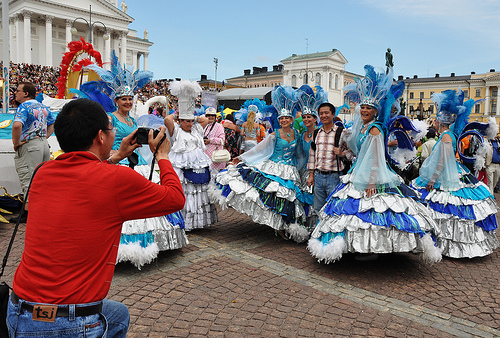

In [67]:
img